# PROYECTO 1 DE DATA SCIENCE - ENFOCADO EN APLICAR ANÁLISIS EXPLORATORIO DE DATOS

# DATASET IRIS

El dataset Iris, introducido por Ronald Fisher en 1936, es un clásico conjunto de datos multiclase usado para tareas de clasificación.

Contiene 150 muestras de tres especies de flores (Iris setosa, Iris virginica e Iris versicolor), con cuatro características:

   1. longitud de sépalos
   2. anchura de sépalos
   3. Longitud de pétalos
   4. Anchura de pétalos

## Objetivo

El objetivo principal es construir un modelo que, usando estas características, clasifique correctamente las especies de flores con la mayor precisión posible.

# 1. INICIALIZACIÓN

## 1.1. IMPORTS

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## 1.2. AJUSTES INICIALES

In [5]:
%matplotlib inline

plt.style.use('bmh')
sns.set(style='whitegrid')

# 2. CARGA Y PREPROCESAMIENTO DEL DATASET

## 2.1. LECTURA DE DATOS

In [6]:
df = pd.read_csv('Iris.csv')

In [7]:
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

## 2.2. PREPROCESAMIENTO

In [8]:
df.rename({'SepalLengthCm':'sep_l',
           'SepalWidthCm':'sep_a',
           'PetalLengthCm':'pet_l',
           'PetalWidthCm':'pet_a',
           'Species':'especie'},
          axis=1, inplace=True)

#  3. LIMPIEZA DE DATOS

In [9]:
df.drop('Id', axis=1, inplace=True)
df.head(7)

,sep_l,sep_a,pet_l,pet_a,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


# 4. ANÁLISIS DESCRIPTIVO

In [10]:
df.head(8)

,sep_l,sep_a,pet_l,pet_a,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


### DIMENSIONES DEL DATASET

In [11]:
df.shape

(150, 5)

### INFORMACIÓN GENERAL DEL DATASET

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sep_l    150 non-null    float64
 1   sep_a    150 non-null    float64
 2   pet_l    150 non-null    float64
 3   pet_a    150 non-null    float64
 4   especie  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()

,sep_l,sep_a,pet_l,pet_a
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### RECUENTO DE LA VARIABLE A PREDECIR

In [14]:
df['especie'].value_counts()

,count
especie,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<ipython-input-15-96b08e55e917>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (data= df, x='especie', palette='pastel')


<Axes: xlabel='especie', ylabel='count'>

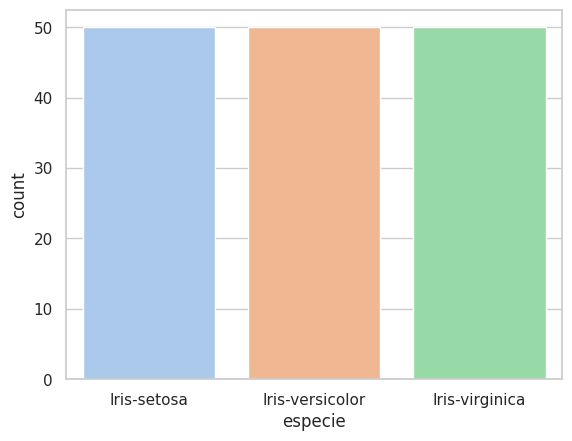

In [15]:
couns = df['especie'].value_counts()
sns.countplot (data= df, x='especie', palette='pastel')

### COMPROBACIÓN DE VARIABLES NULAS

In [16]:
df.isnull().sum(axis=0)

,0
sep_l,0
sep_a,0
pet_l,0
pet_a,0
especie,0


# 5. ANÁLISIS UNIVARIANTE

## 5.1. LONGITUD DEL SÉPALO

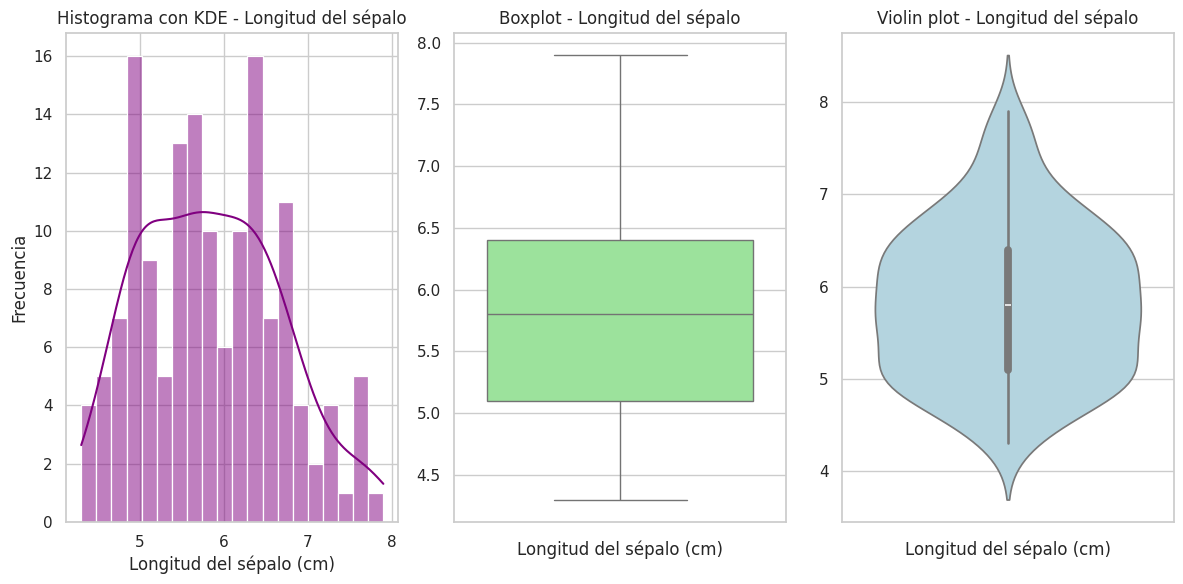

In [17]:
# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['sep_l'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Longitud del sépalo')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['sep_l'], color='lightgreen')
plt.title('Boxplot - Longitud del sépalo')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['sep_l'], color='lightblue')
plt.title('Violin plot - Longitud del sépalo')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## 5.2. ANCHO DEL SÉPALO

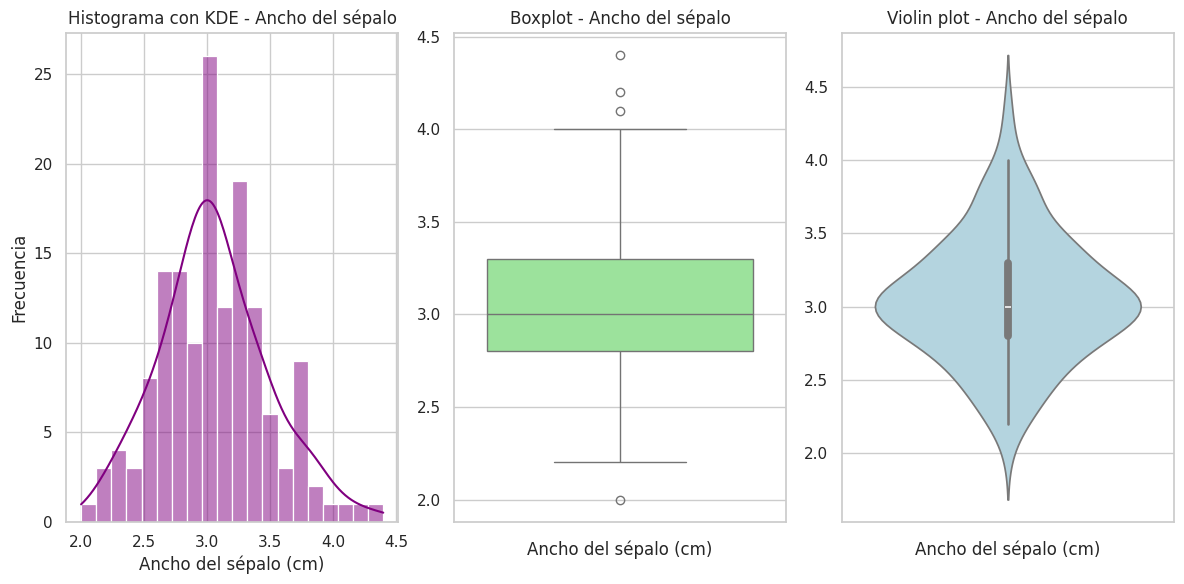

In [18]:
# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['sep_a'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['sep_a'], color='lightgreen')
plt.title('Boxplot - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['sep_a'], color='lightblue')
plt.title('Violin plot - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## 5.3. LONGITUD DEL PÉTALO

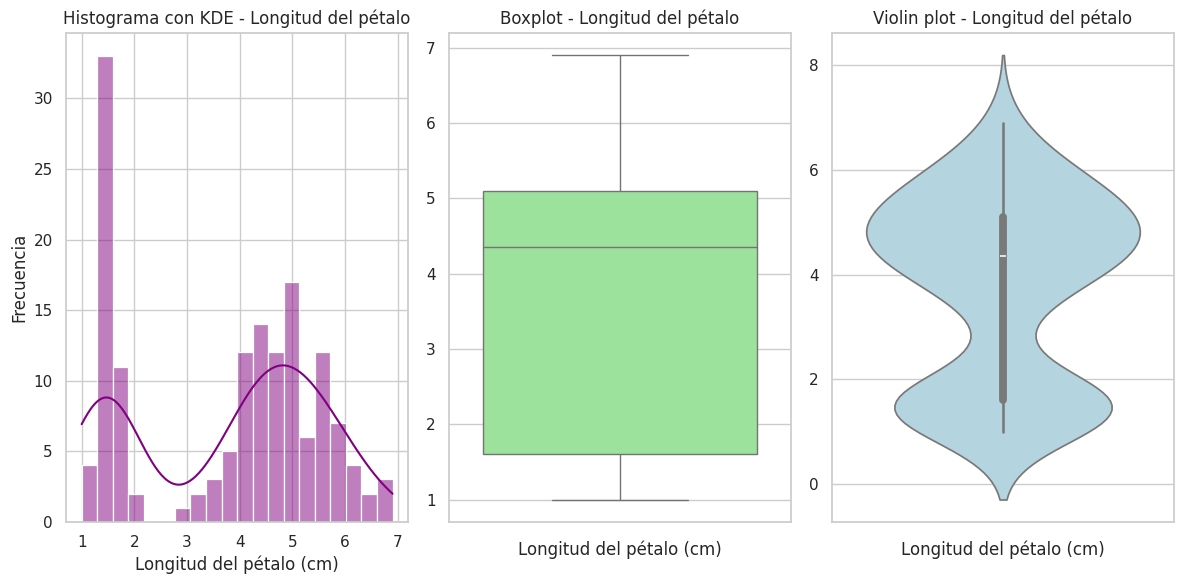

In [19]:
# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['pet_l'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['pet_l'], color='lightgreen')
plt.title('Boxplot - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['pet_l'], color='lightblue')
plt.title('Violin plot - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## 5.4. ANCHO DEL PÉTALO

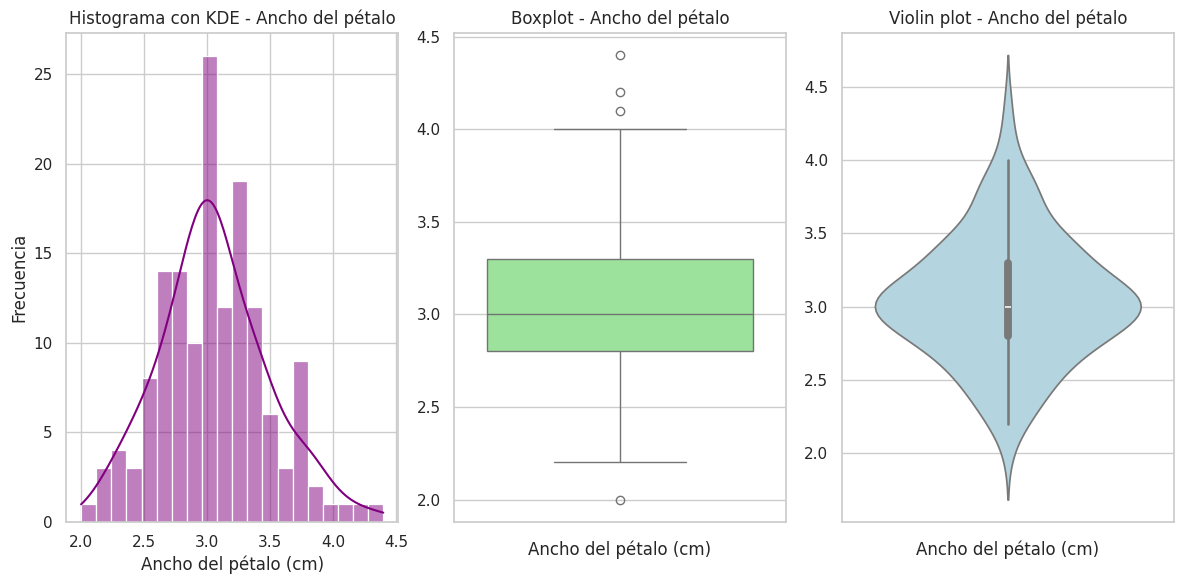

In [20]:
# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['sep_a'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['sep_a'], color='lightgreen')
plt.title('Boxplot - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['sep_a'], color='lightblue')
plt.title('Violin plot - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# 6. ANÁLISIS MULTIVARIANTE

## 6.1. LONGITUD DE SÉPALO Y ESPECIE

<ipython-input-21-0130bd9603d6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[0, 1])
<ipython-input-21-0130bd9603d6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[1, 0])


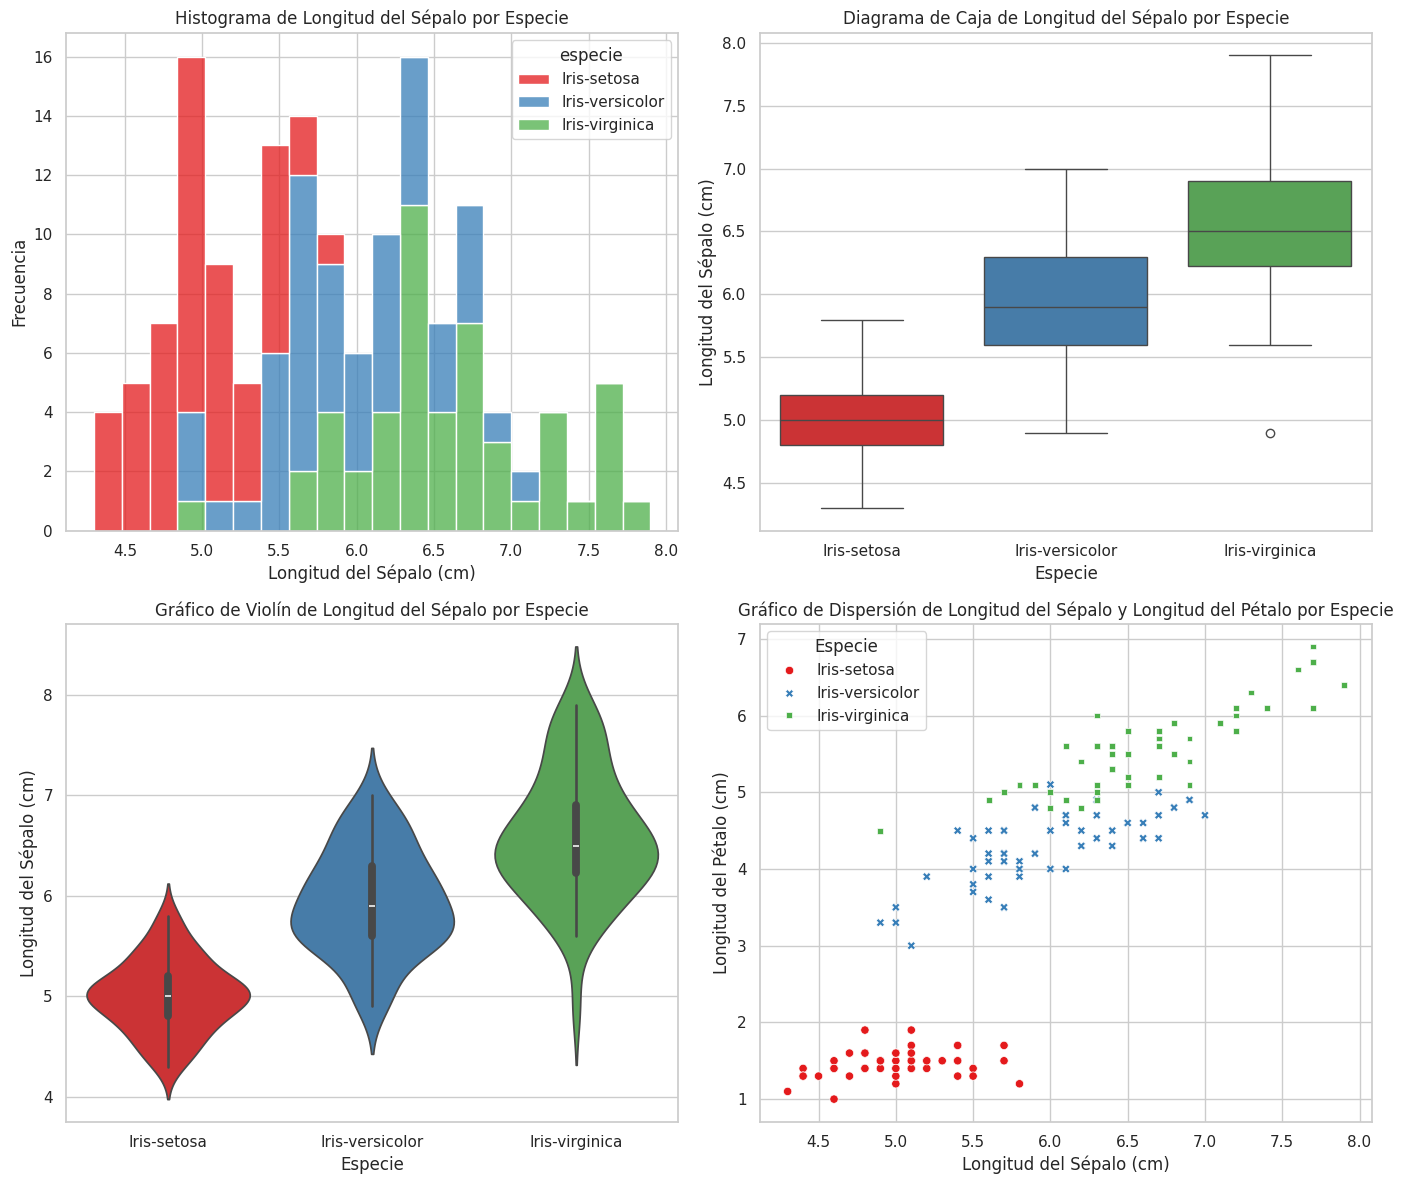

In [21]:
# Crear una figura con una cuadrícula de 2x2 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histograma de Longitud del Sépalo por Especie
sns.histplot(data=df, x='sep_l', hue='especie', multiple='stack', palette='Set1', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Histograma de Longitud del Sépalo por Especie')
axs[0, 0].set_xlabel('Longitud del Sépalo (cm)')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) de Longitud del Sépalo por Especie
sns.boxplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Diagrama de Caja de Longitud del Sépalo por Especie')
axs[0, 1].set_xlabel('Especie')
axs[0, 1].set_ylabel('Longitud del Sépalo (cm)')

# 3. Gráfico de Violín de Longitud del Sépalo por Especie
sns.violinplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('Gráfico de Violín de Longitud del Sépalo por Especie')
axs[1, 0].set_xlabel('Especie')
axs[1, 0].set_ylabel('Longitud del Sépalo (cm)')

# 4. Gráfico de Dispersión (Scatter Plot) de Longitud del Sépalo por Especie
sns.scatterplot(data=df, x='sep_l', y='pet_l', hue='especie', palette='Set1', style='especie', ax=axs[1, 1])
axs[1, 1].set_title('Gráfico de Dispersión de Longitud del Sépalo y Longitud del Pétalo por Especie')
axs[1, 1].set_xlabel('Longitud del Sépalo (cm)')
axs[1, 1].set_ylabel('Longitud del Pétalo (cm)')
axs[1, 1].legend(title='Especie')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()

## 6.2. ANCHO DEL SÉPALO Y ESPECIE

<ipython-input-22-0b6209867251>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[0, 1])
<ipython-input-22-0b6209867251>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[1, 0])


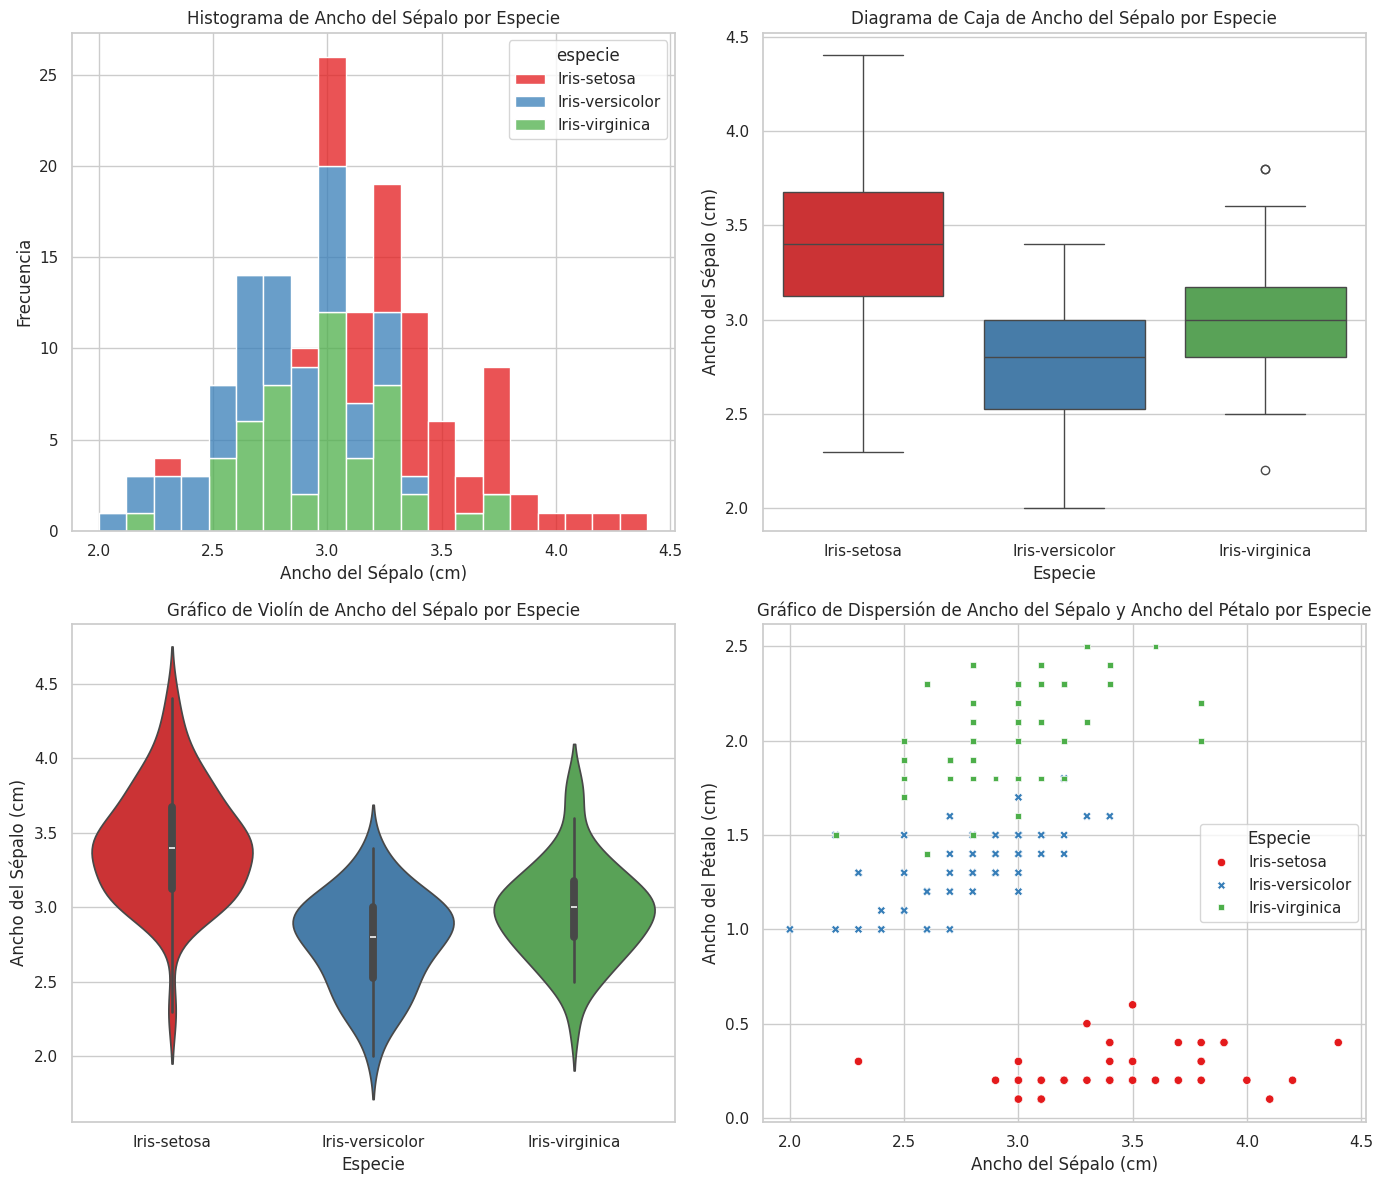

In [22]:
# Crear una figura con una cuadrícula de 2x2 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histograma de Ancho del Sépalo por Especie
sns.histplot(data=df, x='sep_a', hue='especie', multiple='stack', palette='Set1', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Histograma de Ancho del Sépalo por Especie')
axs[0, 0].set_xlabel('Ancho del Sépalo (cm)')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) de Ancho del Sépalo por Especie
sns.boxplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Diagrama de Caja de Ancho del Sépalo por Especie')
axs[0, 1].set_xlabel('Especie')
axs[0, 1].set_ylabel('Ancho del Sépalo (cm)')

# 3. Gráfico de Violín de Ancho del Sépalo por Especie
sns.violinplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('Gráfico de Violín de Ancho del Sépalo por Especie')
axs[1, 0].set_xlabel('Especie')
axs[1, 0].set_ylabel('Ancho del Sépalo (cm)')

# 4. Gráfico de Dispersión (Scatter Plot) de Ancho del Sépalo por Especie
sns.scatterplot(data=df, x='sep_a', y='pet_a', hue='especie', palette='Set1', style='especie', ax=axs[1, 1])
axs[1, 1].set_title('Gráfico de Dispersión de Ancho del Sépalo y Ancho del Pétalo por Especie')
axs[1, 1].set_xlabel('Ancho del Sépalo (cm)')
axs[1, 1].set_ylabel('Ancho del Pétalo (cm)')
axs[1, 1].legend(title='Especie')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()

## 6.3. RELACIÓN ENTRE TODAS LAS VARIABLES

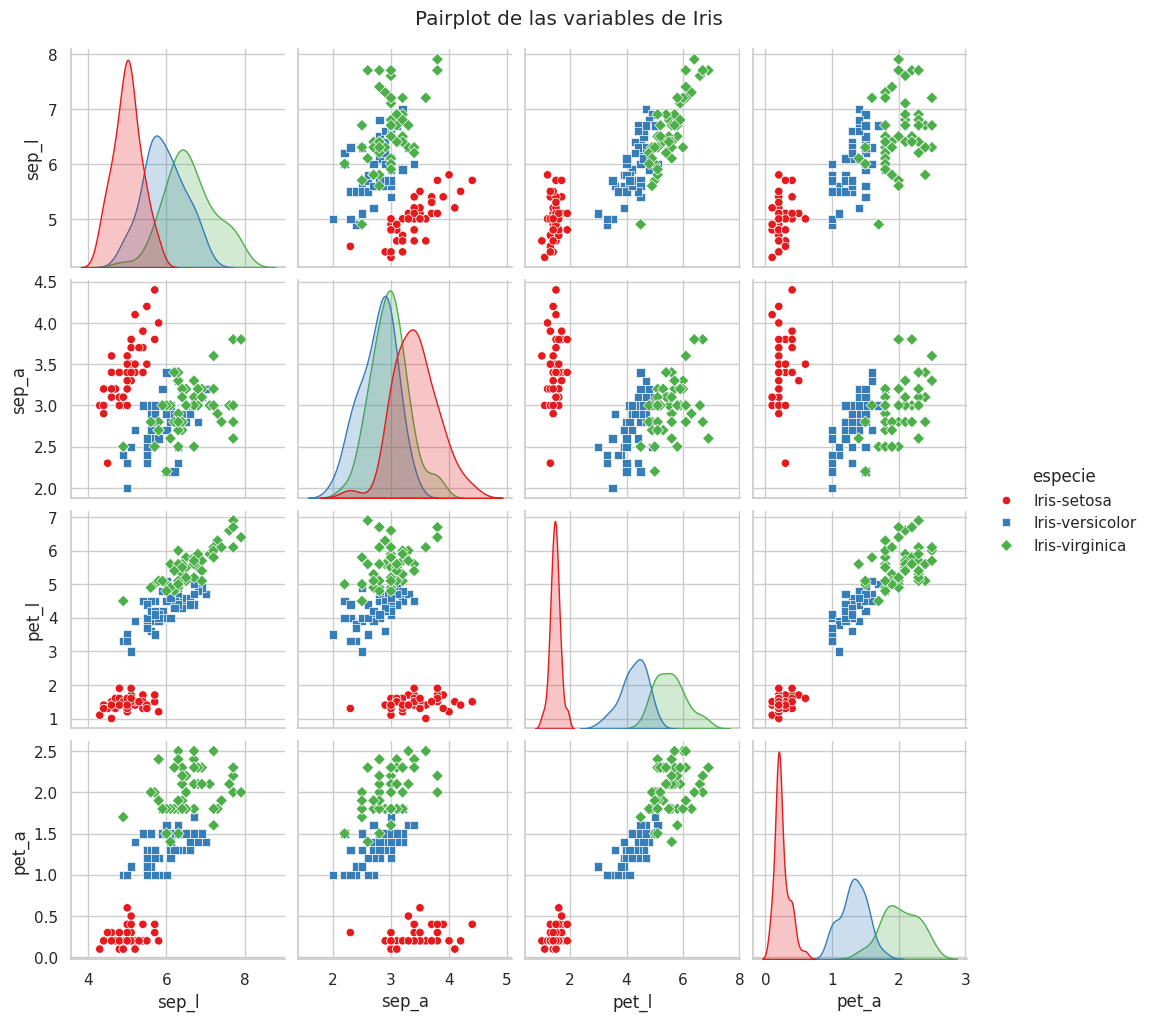

In [23]:
# Pairplot: muestra la relación entre todas las variables
sns.pairplot(df, hue='especie', markers=["o", "s", "D"], palette="Set1")
plt.suptitle('Pairplot de las variables de Iris', y=1.02)
plt.show()

## 6.4. CORRELACIÓN ENTRE VARIABLES

In [24]:
# Calculate the correlation matrix only for numerical columns
numerical_columns = ['sep_l', 'sep_a', 'pet_l', 'pet_a']  # List of your numerical columns
correlation_matrix = df[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

          sep_l     sep_a     pet_l     pet_a
sep_l  1.000000 -0.109369  0.871754  0.817954
sep_a -0.109369  1.000000 -0.420516 -0.356544
pet_l  0.871754 -0.420516  1.000000  0.962757
pet_a  0.817954 -0.356544  0.962757  1.000000


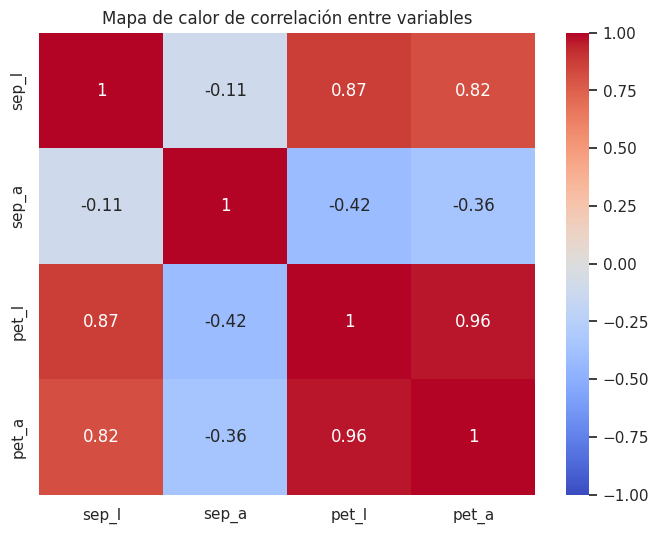

In [25]:
# 2. Heatmap de la correlación entre variables
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación entre variables')
plt.show()

## 6.5. RELACIÓN ENTRE 3 VARIABLES

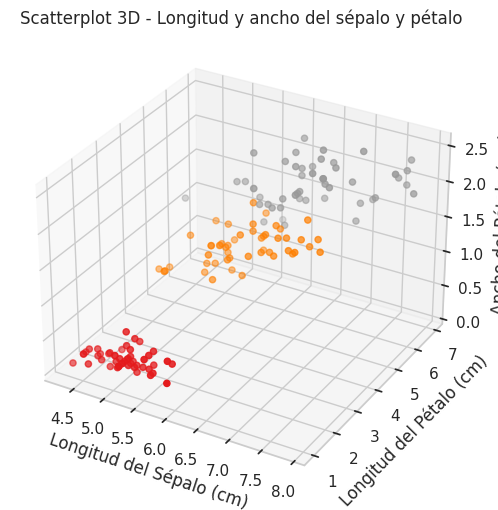

In [26]:
# 3. Scatterplot 3D: mostrar la relación entre 3 variables
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear scatterplot 3D usando 3 dimensiones: longitud del sépalo, longitud del pétalo y ancho del pétalo
scatter = ax.scatter(
    df['sep_l'],
    df['pet_l'],
    df['pet_a'],
    c=pd.Categorical(df['especie']).codes,
    cmap='Set1'
)

# Etiquetas
ax.set_xlabel('Longitud del Sépalo (cm)')
ax.set_ylabel('Longitud del Pétalo (cm)')
ax.set_zlabel('Ancho del Pétalo (cm)')
plt.title('Scatterplot 3D - Longitud y ancho del sépalo y pétalo')

# Mostrar gráfico
plt.show()

# 7. CONCLUSIONES DEL ANÁLISIS



*   El dataset IRIS se encontraba muy balanceado, sin valores nulos y con la misma cantidad de datos para cada especie.
*   Al realizar el análisis univariante podemos observar que la longitud del sépalo se encuentran con valores esparcidos, permitiendo ser una variable diferenciadora para la clasificación.
*   Al realizar el análisis multivariante podemos observar una diferencia entre las longitudes del sépalo según el tipo de planta, volviendo a confirmar que la variable que se debería utilizar para la clasificación es la longitud del sépalo.
*   Verificando la correlación entre las variables se pudo notar una correlación positiva entre la longitud del sépalo y el pétalo y la longitud del pétalo y el ancho del pétalo, siendo variables a considerar.



# 8. MODELO PREDICTIVO

## 8.1. ENTRENAMIENTO DEL MODELO

In [28]:
# Separar características (X) y etiquetas (y)
X = df.drop(columns=['especie'])
y = df['especie']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 8.2. EVALUACIÓN DEL MODELO

In [31]:
# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 1.00


## 8.3. PRUEBA DE LA PREDICCIÓN

In [35]:
nuevos_datos = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
prediccion = model.predict(nuevos_datos)
print(prediccion)

['Iris-setosa']


In [36]:
import joblib

# Guardar el modelo
joblib.dump(model, 'modelo_rf.pkl')


['modelo_rf.pkl']